In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# read in the training and test data, and combine them into a list
train_titanic = pd.read_csv('t_train.csv')
test_titanic = pd.read_csv('t_test.csv')
train_test = [train_titanic, test_titanic]

In [3]:
# preview the data to see initial potential relationships
train_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# in order to see what features are available to us we can print the columns
print(train_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# the first comparison that had a relationship was sex vs survival
train_titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


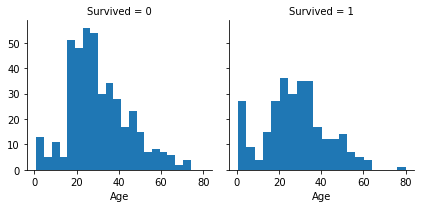

In [6]:
# the second relationship was age vs survival
age = sns.FacetGrid(train_titanic, col='Survived')
age.map(plt.hist, 'Age', bins=20)

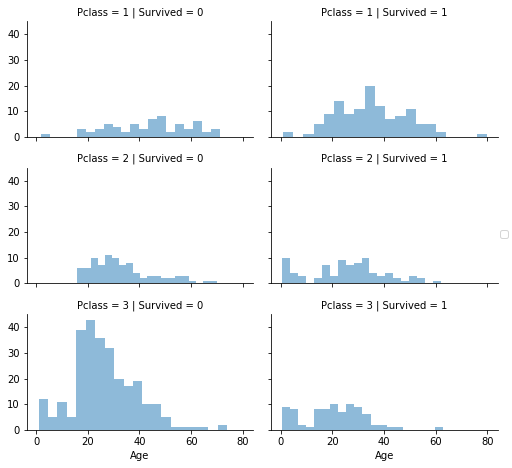

In [7]:
# the third relationship was which class the passenger was traveling in vs their survival
pclassage = sns.FacetGrid(train_titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclassage.map(plt.hist, 'Age', alpha=.5, bins=20)
pclassage.add_legend();

In [8]:
# probability of survival depending on how many parents/children the passender was traveling with
train_titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


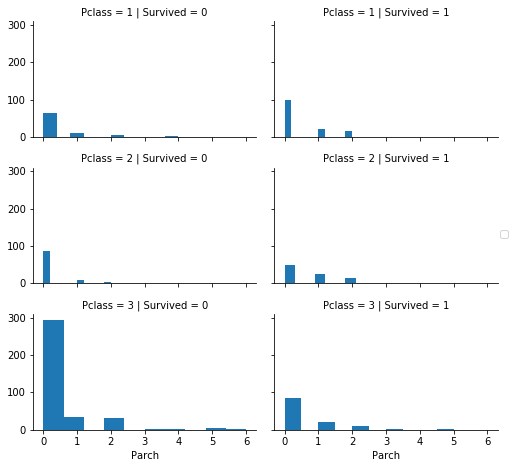

In [9]:
# these charts compare survival with travel class against number of parents/children with the passenger
pclassparch = sns.FacetGrid(train_titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclassparch.map(plt.hist, 'Parch')
pclassparch.add_legend();

In [10]:
# after deciding what features to work with, we removed the extraneous columns from our dataset

train_titanic = train_titanic.drop(['SibSp','Ticket', 'Fare', 'Cabin','Embarked'], axis=1)
test_titanic = test_titanic.drop(['SibSp','Ticket', 'Fare', 'Cabin','Embarked'], axis=1)
train_test = [train_titanic, test_titanic]

"After", train_titanic.shape, test_titanic.shape, train_test[0].shape, train_test[1].shape

('After', (891, 7), (418, 6), (891, 7), (418, 6))

In [11]:
# assign the ages to groups so as to offer an easy comparison with the other data values

for dataset in train_test:    
    dataset.loc[ dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 50), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 51) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 61, 'Age']
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0


In [12]:
# map the sex to numeric values so to make comparisons with other data values easier

for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0


In [13]:
# drop the name feature as it was irrelevant to our investigation
train_titanic = train_titanic.drop(['Name'], axis=1)
test_titanic = test_titanic.drop(['Name'], axis=1)
train_test = [train_titanic, test_titanic]

"After", train_titanic.shape, test_titanic.shape, train_test[0].shape, train_test[1].shape

('After', (891, 6), (418, 5), (891, 6), (418, 5))

In [14]:
# check to ensure only the columns we need are left

train_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,Parch
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,4.504902,0.381594
std,257.353842,0.486592,0.836071,0.477990,12.963198,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,6.000000


In [15]:
print(train_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'Parch']


In [16]:
# several rows had empty cells in certain columns, so here the rows with null values were dropped

log_train=train_titanic.dropna(axis=0,how='any')

In [17]:
# verify null values are gone

log_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Parch
0,1,0,3,0,1.0,0
1,2,1,1,1,2.0,0
2,3,1,3,1,1.0,0
3,4,1,1,1,2.0,0
4,5,0,3,0,2.0,0
6,7,0,1,0,3.0,0
7,8,0,3,0,0.0,1
8,9,1,3,1,1.0,2
9,10,1,2,1,0.0,0
10,11,1,3,1,0.0,1


In [18]:
# repeat for test data

log_test=test_titanic.dropna(axis=0,how='any')

In [19]:
# verify null values are gone

log_test.head(10)

,PassengerId,Pclass,Sex,Age,Parch
0,892,3,0,2.0,0
1,893,3,1,2.0,0
2,894,2,0,62.0,0
3,895,3,0,1.0,0
4,896,3,1,1.0,1
5,897,3,0,0.0,0
6,898,3,1,1.0,0
7,899,2,0,1.0,1
8,900,3,1,0.0,0
9,901,3,0,1.0,0


In [20]:
# separate the training data into the X matrix, i.e. features, and the Y matrix, i.e. results

X_train = log_train.drop(['Survived','PassengerId'], axis=1)
Y_train = log_train["Survived"]
X_test  = log_test.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((714, 4), (714,), (332, 4))

In [21]:
# run logistic regression on the data

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.01

In [22]:
# check the fit

linregmodel= pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Score': [acc_log]})

In [23]:
# check the survival results

survivalresult = pd.DataFrame({
        "PassengerId": log_test["PassengerId"],
        "Survived": Y_pred
    })

In [24]:
print(survivalresult)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
30           922         0
31           923         0
32           924         1
..           ...       ...
381         1273         0
383         1275         1
385         1277         1
386         1278         0
387         1279         0
3

In [25]:
# below is a prediction of how many would have survived

survivalresult['Survived'].value_counts()

0    205
1    127
Name: Survived, dtype: int64

In [26]:
submission = pd.DataFrame(survivalresult)
submission.to_csv('HW1_part2_results.csv', index=False)